In [ ]:
import matplotlib.pyplot as plt
import random
import heapq
import numpy as np



In [ ]:
world=[]
BigWorld = []
for a in range(5):
  world.append('clean')
for b in range (5):
  BigWorld.append(world)
BigWorld

[['clean', 'clean', 'clean', 'clean', 'clean'],
 ['clean', 'clean', 'clean', 'clean', 'clean'],
 ['clean', 'clean', 'clean', 'clean', 'clean'],
 ['clean', 'clean', 'clean', 'clean', 'clean'],
 ['clean', 'clean', 'clean', 'clean', 'clean']]

In [ ]:
class WorldMap:
    def __init__(self, rows, cols, num_dirt_blocks, num_obs):
        self.rows = rows
        self.cols = cols
        self.num_dirt_blocks = num_dirt_blocks
        self.num_obs = num_obs
        self.world_map = [['clean' for _ in range(cols)] for _ in range(rows)]

        self.agent_positions = {}  # Dictionary to store agent positions

        # Place dirt blocks randomly on the map
        for _ in range(num_dirt_blocks):
            row = random.randint(0, rows - 1)
            col = random.randint(0, cols - 1)
            while self.world_map[row][col] == 'dirt' or self.world_map[row][col] == 'agent':
                row = random.randint(0, rows - 1)
                col = random.randint(0, cols - 1)
            self.world_map[row][col] = 'dirt'

        # Place obstacles randomly on the map (excluding corners)
        for _ in range(num_obs):
            row = random.randint(1, rows - 2)  # Avoid corners
            col = random.randint(1, cols - 2)  # Avoid corners
            while self.world_map[row][col] == 'dirt' or self.world_map[row][col] == 'agent' or self.world_map[row][col] == 'obs':
                row = random.randint(1, rows - 2)  # Avoid corners
                col = random.randint(1, cols - 2)  # Avoid corners
            self.world_map[row][col] = 'obs'

    def add_agent(self, agent_id):
        while True:
            row = random.randint(0, self.rows - 1)
            col = random.randint(0, self.cols - 1)
            if self.world_map[row][col] == 'clean':
                self.world_map[row][col] = 'agent'
                self.agent_positions[agent_id] = (col,row)
                break


    def getAgentPos(self, agent_id):
        if agent_id in self.agent_positions:
            return self.agent_positions[agent_id]
        else:
            return None  # Agent not found

    def move_agent(self, agent_id, new_position):
        if agent_id in self.agent_positions:
            current_position = self.agent_positions[agent_id]
            if self.world_map[current_position[1]][current_position[0]] == 'agent':
                self.world_map[current_position[1]][current_position[0]] = 'clean'  # Clear the current cell
            self.world_map[new_position[1]][new_position[0]] = 'agent'  # Place the agent in the new cell
            self.agent_positions[agent_id] = new_position  # Update the agent's position


    def display_map(self):
        fig,ax = plt.subplots() # Clear the current plot
        for row in range(self.rows):
            for col in range(self.cols):
                if self.world_map[row][col] == 'dirt':
                    ax.plot(col + 0.5,  row + 0.5, 'ro', markersize=10)  # Display dirt as red dots
                elif self.world_map[row][col] == 'agent':
                    ax.plot(col + 0.5, row + 0.5, 'bo', markersize=10)  # Display agents as blue dots
                elif self.world_map[row][col] == 'obs':
                    ax.plot(col + 0.5, row + 0.5, 'ko', markersize=10)  # Display obstacles as black dots

        ax.set_xlim(0, self.cols)
        ax.set_ylim(0, self.rows)

        ax.set_xticks(range(self.cols))
        ax.set_yticks(range(self.rows))
        ax.grid()

    def is_valid_position(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols


In [ ]:
world = WorldMap(5,5,10,3)
world.add_agent('A')

[['clean', 'clean', 'clean', 'dirt', 'dirt'], ['dirt', 'obs', 'dirt', 'obs', 'clean'], ['clean', 'obs', 'dirt', 'clean', 'clean'], ['clean', 'dirt', 'clean', 'dirt', 'dirt'], ['dirt', 'agent', 'clean', 'dirt', 'clean']]


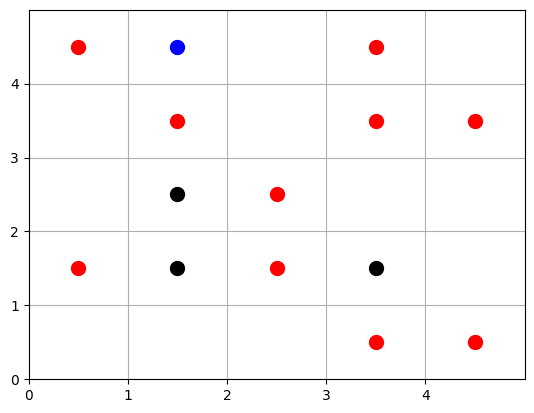

In [ ]:
print(world.world_map)
world.display_map()

<ipython-input-2-3c4f54fd9f86>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots() # Clear the current plot


[(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 3), (3, 3), (3, 2), (4, 2), (4, 3), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 3), (2, 2), (2, 3), (1, 3), (2, 3)]


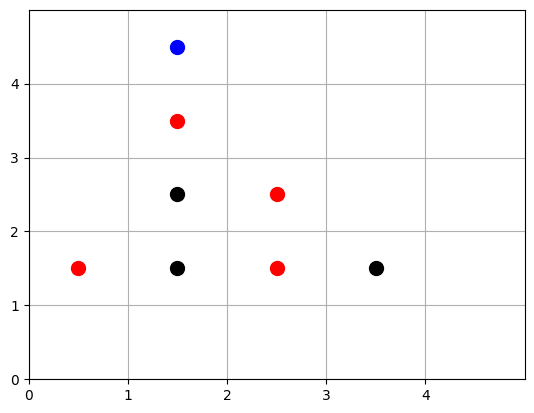

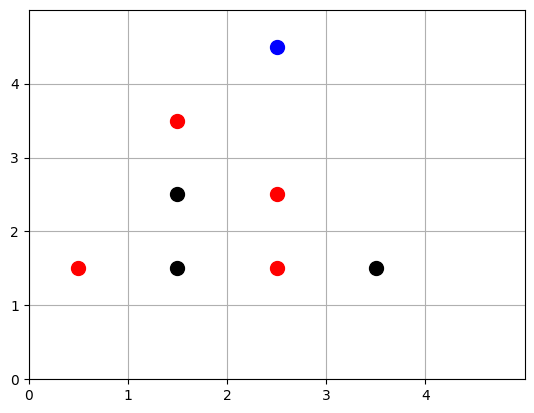

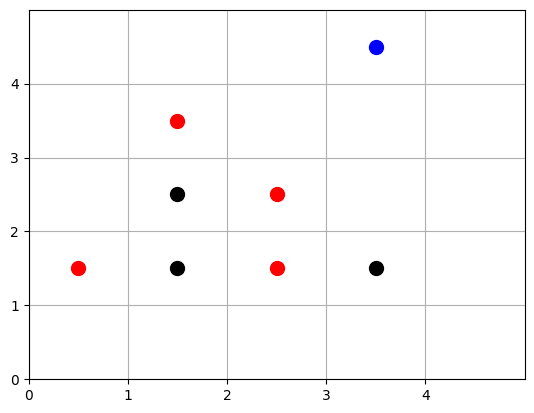

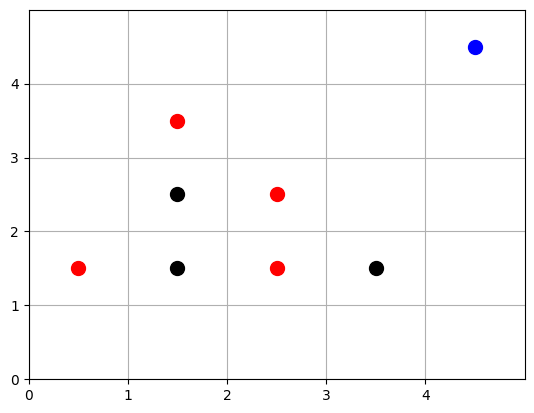

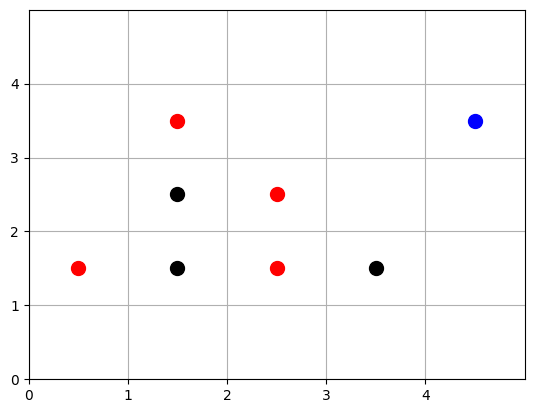

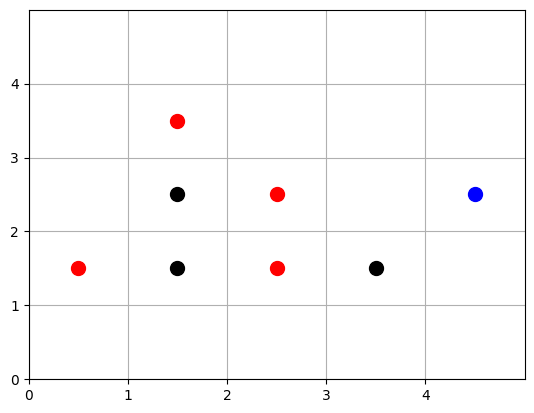

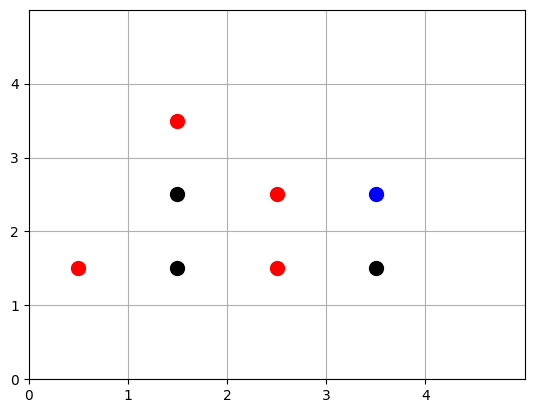

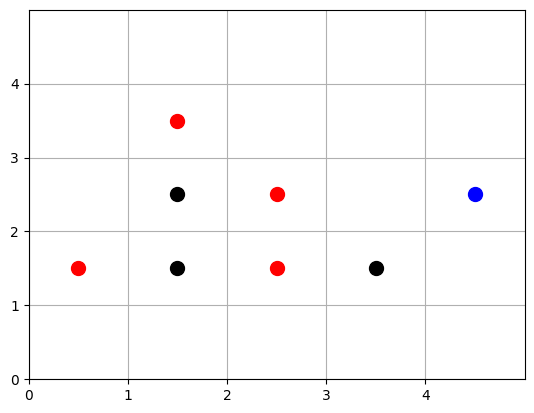

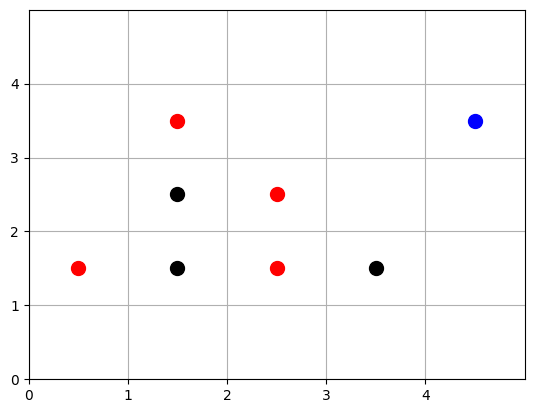

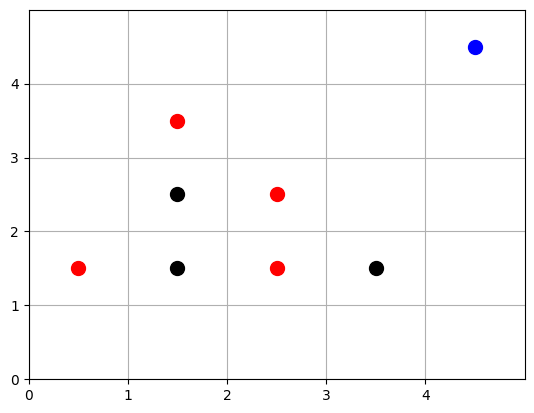

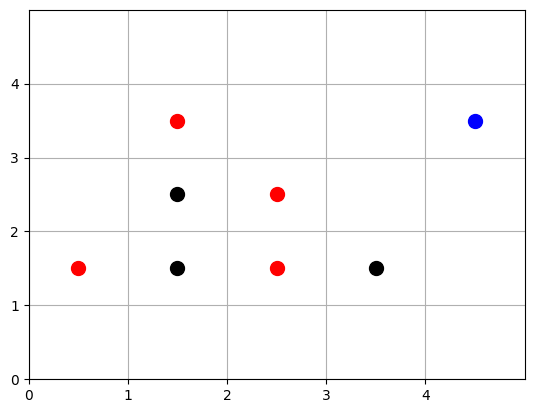

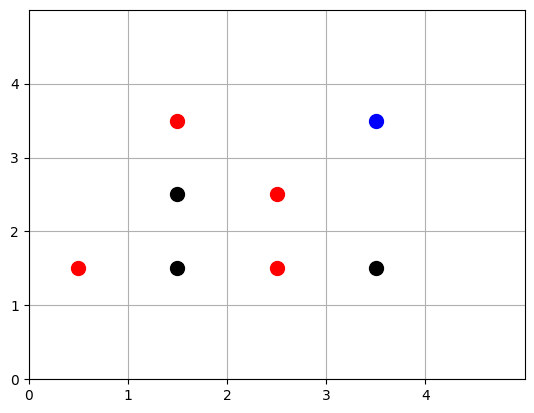

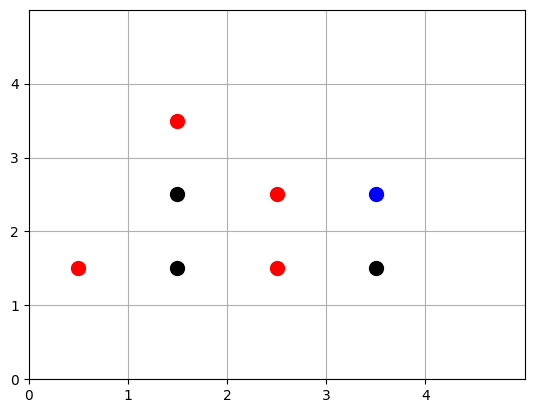

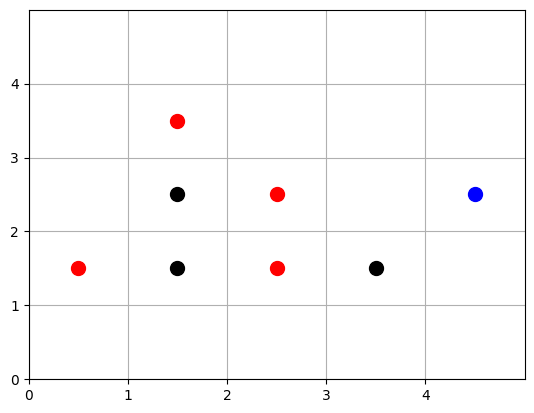

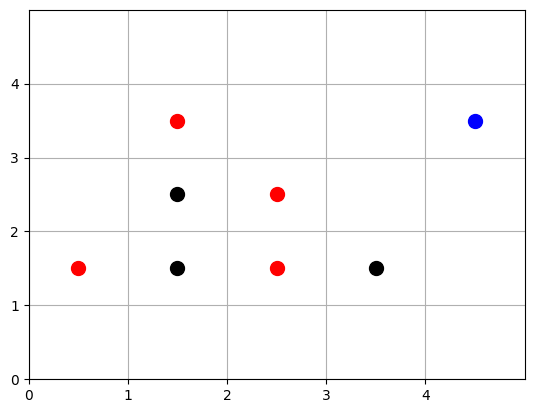

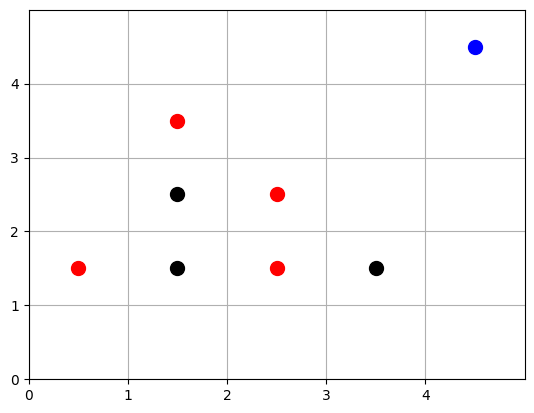

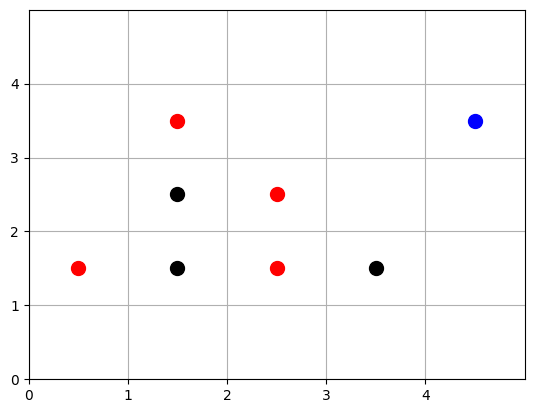

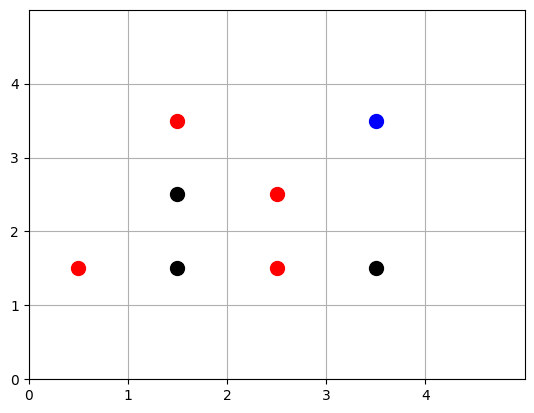

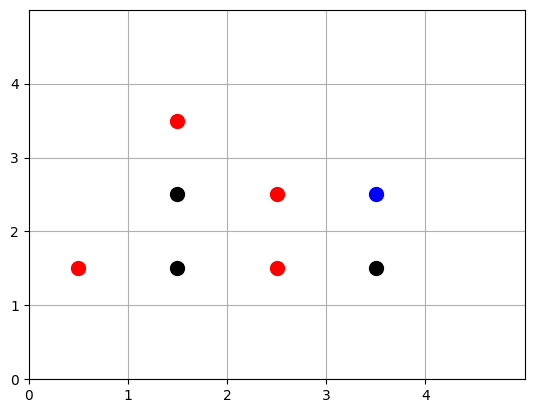

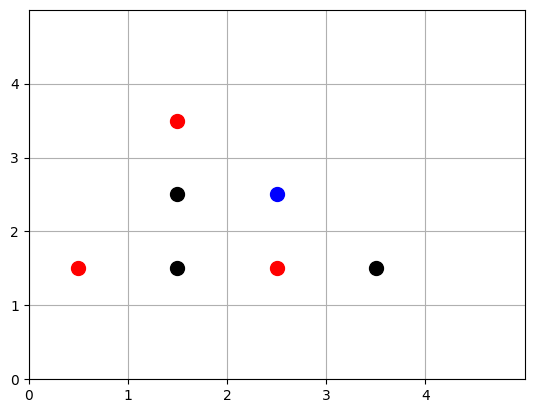

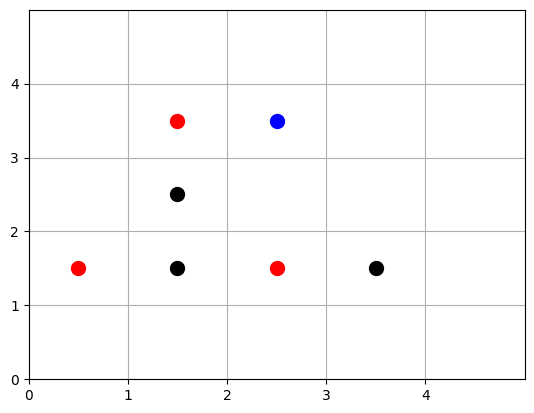

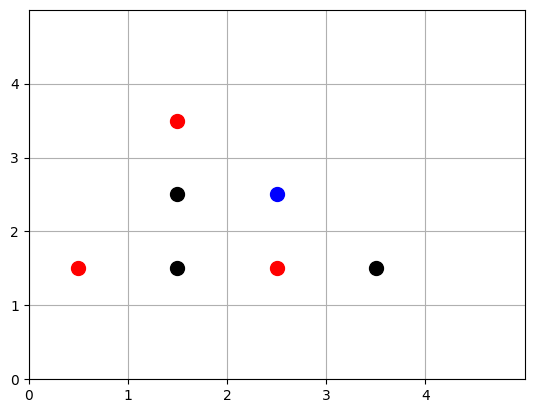

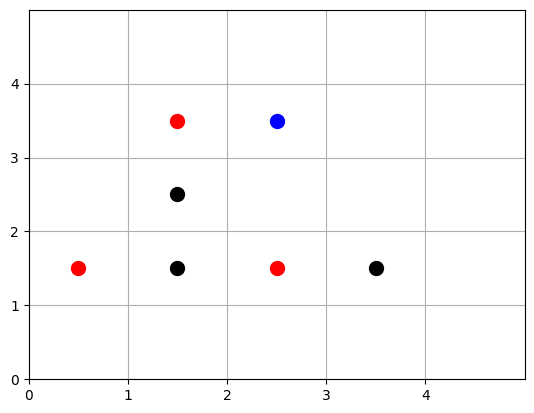

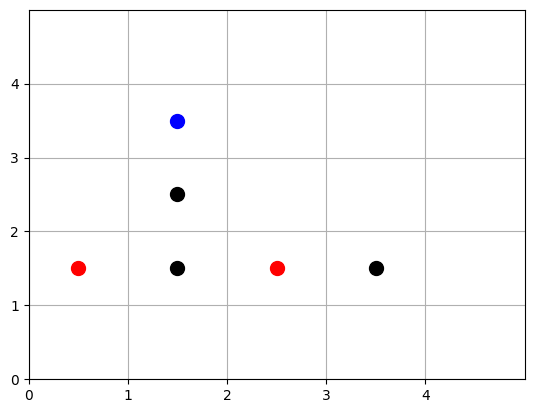

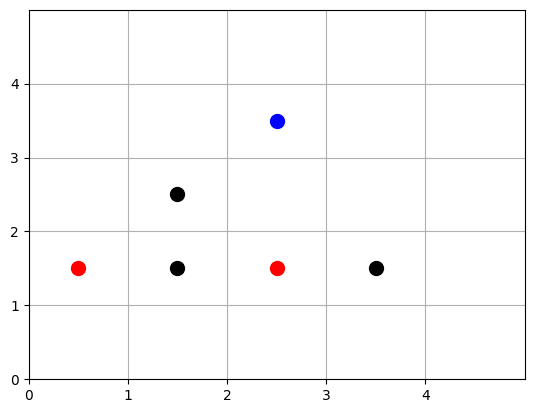

In [ ]:
path=[world.getAgentPos('A')]
count = 0
while count < 25:
  a = random.randint(0,4)
  if a == 0:
    pos = world.getAgentPos('A')
    right = (pos[0]+1,pos[1])
    if world.is_valid_position(right[1],right[0]) and world.world_map[right[1]][right[0]] != 'obs': #and right not in path:
       world.move_agent('A',right)
       path.append(right)
       count += 1
       world.display_map()

  elif a == 1:
    pos = world.getAgentPos('A')
    left = (pos[0]-1,pos[1])
    if world.is_valid_position(left[1],left[0]) and world.world_map[left[1]][left[0]] != 'obs':#and left not in path:
       world.move_agent('A',left)
       path.append(left)
       count += 1
       world.display_map()

  elif a == 2:
    pos = world.getAgentPos('A')
    up = (pos[0],pos[1]+1)
    if world.is_valid_position(up[1],up[0]) and world.world_map[up[1]][up[0]] != 'obs':#and up not in path:
       world.move_agent('A',up)
       path.append(up)
       count += 1
       world.display_map()
  elif a == 3:
    pos = world.getAgentPos('A')
    down = (pos[0],pos[1]-1)
    if world.is_valid_position(down[1],down[0]) and world.world_map[down[1]][down[0]] != 'obs':#and down not in path:
       world.move_agent('A',down)
       path.append(down)
       count += 1
       world.display_map()
print(path)




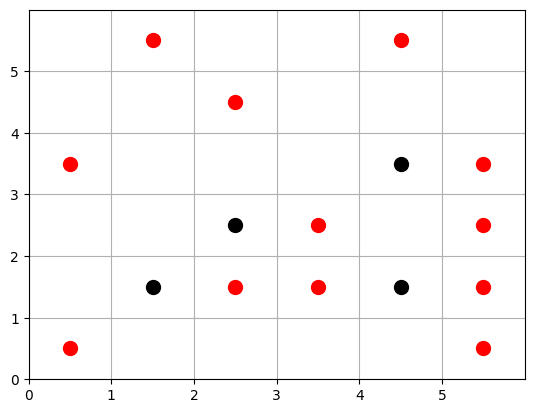

In [ ]:
prateeks_world = WorldMap(6,6,12,4)
prateeks_world.display_map()

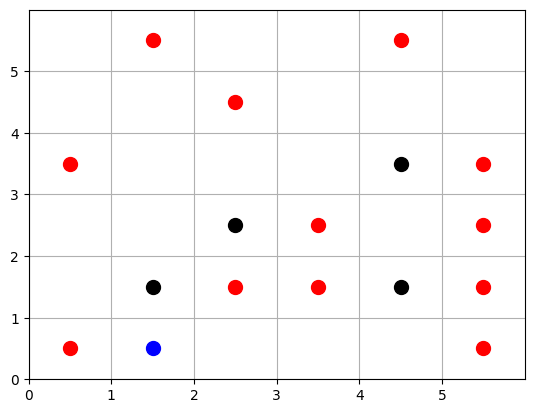

In [ ]:
prateeks_world.add_agent('V')
prateeks_world.display_map()

(1, 0)


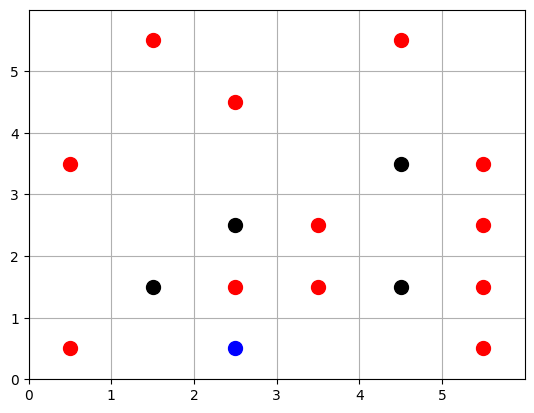

In [ ]:
position = prateeks_world.getAgentPos('V')
new_position_for_right_mover = (position[0]+1,position[1])
print(position)
prateeks_world.move_agent('V',new_position_for_right_mover)
prateeks_world.display_map()

In [ ]:
position = prateeks_world.getAgentPos('V')
new_position_for_left_mover = (position[0]-1,position[1])
prateeks_world.move_agent('V',new_position_for_right_mover)
prateeks_world.display_map()


In [ ]:
path=[]
position = prateeks_world.getAgentPos('V')
a = random.randint(0,4)

if a == 0:
  left = (position[0]-1,position[1])
  if not position[0] == 0 and prateeks_world.worldmap[left[1],left[0]]=='obs':
    prateeks_world.move_agent('V',new_position_for_right_mover)
    prateeks_world.display_map()

if a == 1:
  right = (position[0]+1,position[1])
  if not position[0] == prateeks_world.cols-1 and prateeks_world.worldmap[right[1],right[0]]=='obs':
    prateeks_world.move_agent('V',new_position_for_right_mover)
    prateeks_world.display_map()